# Graphs used in the paper

The graphs used in the paper are rendered below. 

In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

%matplotlib inline

## Figure 1 - 

A simple phylogenetic tree. 

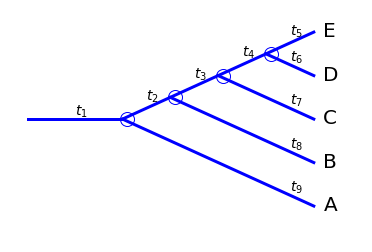

In [35]:
fig1 = plt.figure()

ax = fig1.add_subplot(111)
ax.set_ylim((0, 10))
ax.set_xlim((0, 7))

lines = [[[0, 2], [5, 5]],
         [[2, 6], [5, 9]],
         [[2, 6], [5, 1]],
         [[3, 6], [6, 3]],
         [[4, 6], [7, 5]],
         [[5, 6], [8, 7]]
        ]
for line in lines:
    ax.plot(line[0], line[1], linewidth=3, color='blue')
    
    x = np.sum(line[0])/2
    y = np.sum(line[1])/2

# Plot annotations:

ax.annotate('$t_1$', (1  , 5.2), size=14)
ax.annotate('$t_2$', (2.5, 5.9), size=14)
ax.annotate('$t_3$', (3.5, 6.9), size=14)
ax.annotate('$t_4$', (4.5, 7.9), size=14)
ax.annotate('$t_5$', (5.5, 8.9), size=14)
ax.annotate('$t_6$', (5.5, 7.7), size=14)
ax.annotate('$t_7$', (5.5, 5.7), size=14)
ax.annotate('$t_8$', (5.5, 3.7), size=14)
ax.annotate('$t_9$', (5.5, 1.7), size=14)

ax.annotate('A', (6.2,  .8), size=20)
ax.annotate('B', (6.2, 2.8), size=20)
ax.annotate('C', (6.2, 4.8), size=20)
ax.annotate('D', (6.2, 6.8), size=20)
ax.annotate('E', (6.2, 8.8), size=20)

ax.plot(2.1, 5, marker='o', markersize=14, markeredgecolor='blue', markerfacecolor='none')
ax.plot(3.1, 6, marker='o', markersize=14, markeredgecolor='blue', markerfacecolor='none')
ax.plot(4.1, 7, marker='o', markersize=14, markeredgecolor='blue', markerfacecolor='none')
ax.plot(5.1, 8, marker='o', markersize=14, markeredgecolor='blue', markerfacecolor='none')

ax.axis('off')
fig1.savefig('AncillaryFiles\\figure1.eps', format='eps', dpi=1000, bbox_inches='tight')

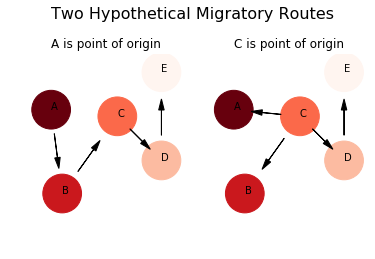

In [36]:
# Let's try a side-by-side plot... 

x=[3,3.1,3.6,4,4]
y=[3.66,2.9,3.6,3.2,4]
name=['A','B','C','D','E']

# Shrink factor - 

sf = 3.5

dx=[]
dy=[]
zx=[]
zy=[]

for i in range(0,len(x)-1):
    Dx = x[i+1] - x[i]
    Dy = y[i+1] - y[i]
    
    zx.append(x[i] + Dx/sf)
    zy.append(y[i] + Dy/sf)
    
    dx.append(Dx/sf)
    dy.append(Dy/sf)

s=[100,80,60,40,20]

myfig = plt.figure()                 # The figure is a figure
mypic = myfig.add_subplot(121, aspect='equal')       # mypic is a subplot added to the figure
mypic.axis('off')                    # turns subplot axes off
mypic.scatter(x, y, c=s, s=1500, cmap="Reds")  #makes the subplot a scatterplot
mypic.scatter(3, 2.6, s=0)
# Not working...a better approach might be to handle this differently.
for i, txt in enumerate(name):
    mypic.annotate(name[i], (x[i],y[i]))     #annotates the figure

for i in range(0,len(x)-1):
    mypic.arrow(zx[i], zy[i], dx[i], dy[i], fc="k", ec="k", head_width=0.05, head_length=0.1)
    
# Here is a sample locational plot of the groups. 

x=[3,3.1,3.6,4,4]
y=[3.66,2.9,3.6,3.2,4]
name=['A','B','C','D','E']

# Shrink factor - 

sf = 3.5

# Arrows have to be done manually for second example:

dx=[(x[0]-x[2])/sf,(x[1]-x[2])/sf,(x[3]-x[2])/sf,(x[4]-x[3])/sf]
dy=[(y[0]-y[2])/sf,(y[1]-y[2])/sf,(y[3]-y[2])/sf,(y[4]-y[3])/sf ]
zx=[x[2] + (x[0]-x[2])/sf,x[2] + (x[1]-x[2])/sf,x[2] + (x[3]-x[2])/sf,x[3] + (x[4]-x[3])/sf]
zy=[y[2] + (y[0]-y[2])/sf,y[2] + (y[1]-y[2])/sf,y[2] + (y[3]-y[2])/sf,y[3] + (y[4]-y[3])/sf]

s=[100,80,60,40,20]

mypic2 = myfig.add_subplot(122, aspect='equal')       # mypic is a subplot added to the figure
mypic2.axis('off')                    # turns subplot axes off

mypic2.scatter(x, y, c=s, s=1500, cmap="Reds")  #makes the subplot a scatterplot
mypic2.scatter(3, 2.6, s=0)
# Not working...a better approach might be to handle this differently.
for i, txt in enumerate(name):
    mypic2.annotate(name[i], (x[i],y[i]))     #annotates the figure

for i in range(0,len(x)-1):
    mypic2.arrow(zx[i], zy[i], dx[i], dy[i], fc="k", ec="k", head_width=0.05, head_length=0.1)

myfig.suptitle('Two Hypothetical Migratory Routes', fontsize=16)
mypic.set_title('A is point of origin')
mypic2.set_title('C is point of origin')

myfig.savefig('AncillaryFiles\\figure2.eps', format='eps', dpi=1000)

# Simulating stochastic differential equations

In [126]:
sigma = .51
r     = 2
tau   = .5
K     = 3

thresh = 3

dt    = .005
T     = 1
n     = int(T/dt)
t     = np.linspace(0., T, n)

sigma_bis = sigma * np.sqrt(2. / tau)
sqrtdt    = np.sqrt(dt)

random.seed(41)

x = np.zeros(n)
x[0] = 1
breached = 0

for i in range(n - 1):
    x[i + 1] = x[i] + dt * r * x[i]*(1 - x[i] / K) + x[i]**2 * sigma_bis * sqrtdt * random.normalvariate(0, 1)
    if (x[i + 1] >= 3) & (breached == 0):
        x[i + 1] = 1
        K = 1
        breached = 1

y    = np.zeros(n)
y[0] = 1        
K    = 3
breached = 0
random.seed(820)

for i in range(n - 1):
    y[i + 1] = y[i] + dt * r * y[i]*(1 - y[i] / K) + y[i]**2 * sigma_bis * sqrtdt * random.normalvariate(0, 1)
    if (y[i + 1] >= 3) & (breached == 0):
        y[i + 1] = 1
        K = 1    
        breached = 1

z    = np.zeros(n)
z[0] = 1        
K    = 3
breached = 0
random.seed(1540)

for i in range(n - 1):
    z[i + 1] = z[i] + dt * r * z[i]*(1 - z[i] / K) + z[i]**2 * sigma_bis * sqrtdt * random.normalvariate(0, 1)
    if (z[i + 1] >= 3) & (breached == 0):
        z[i + 1] = 1
        K = 1    
        breached = 1

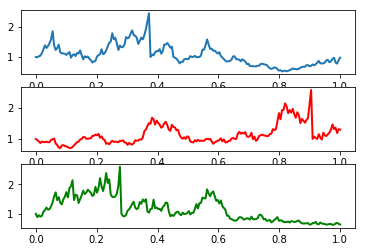

In [127]:
fig = plt.figure()
ax1 = plt.subplot(311)
ax1.plot(t, x, lw=2)
ax2 = plt.subplot(312)
ax2.plot(t, y, lw=2, color='red')
ax3 = plt.subplot(313)
ax3.plot(t, z, lw=2, color='green')
 

In [108]:
breached

1